In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df['Ram'] = df['Ram'].str.replace("GB", "").astype(int)
df['Weight'] = df['Weight'].str.replace("kg", "").astype(float)

In [8]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

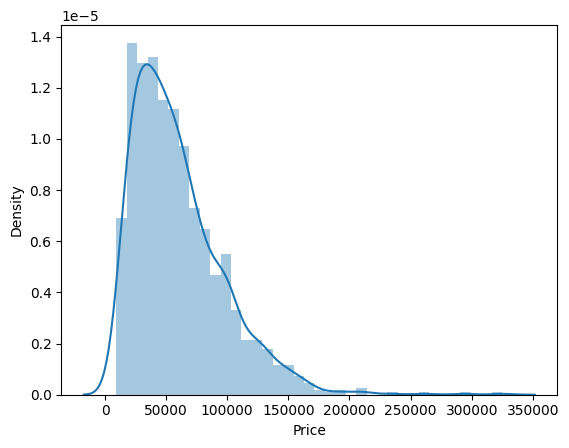

In [10]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

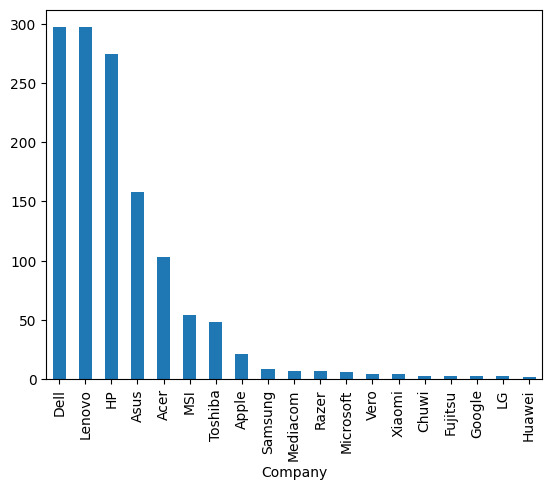

In [11]:
df['Company'].value_counts().plot(kind = 'bar')

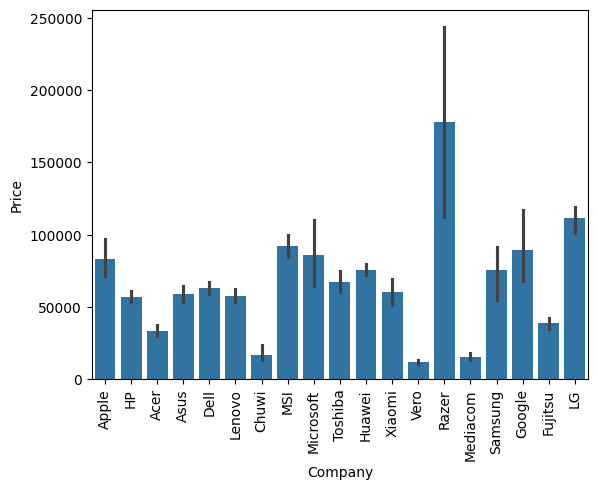

In [12]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [13]:
apple_laptops = df[(df['Company'] == 'Apple')]
apple_laptops.shape

(21, 11)

In [14]:
apple_laptopss = df[(df['Company'] == 'Apple') & (df['Price'] > 100000)]
apple_laptopss.shape

(6, 11)

<Axes: xlabel='TypeName'>

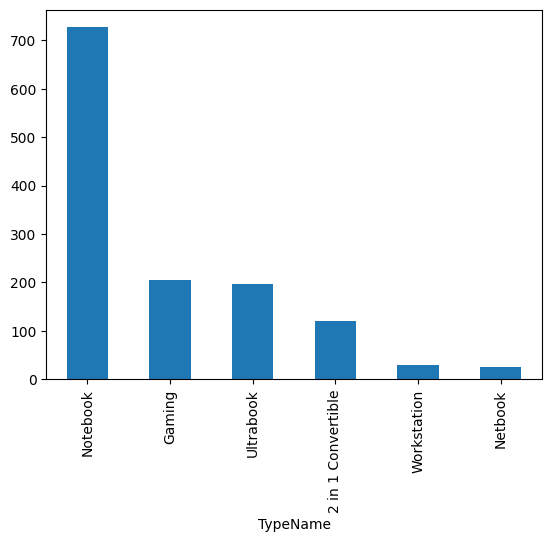

In [15]:
df['TypeName'].value_counts().plot(kind = 'bar')

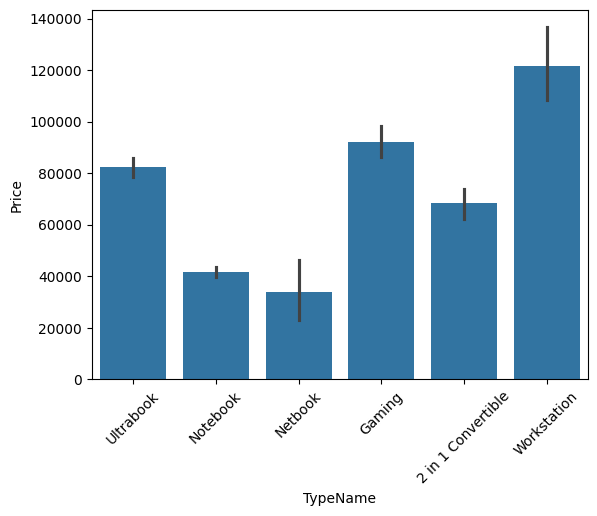

In [16]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Inches'>

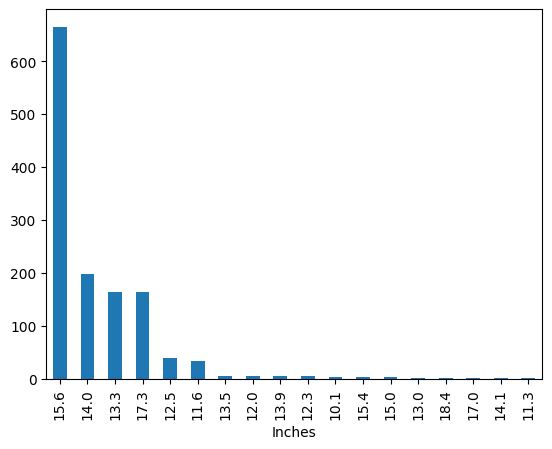

In [17]:
df['Inches'].value_counts().plot(kind = 'bar')

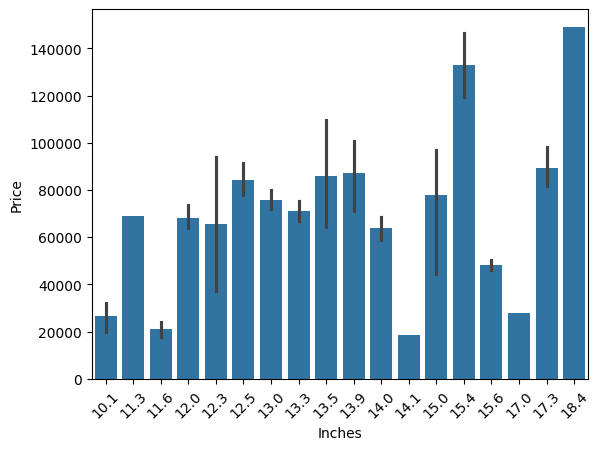

In [18]:
sns.barplot(x = df['Inches'], y = df['Price'])
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

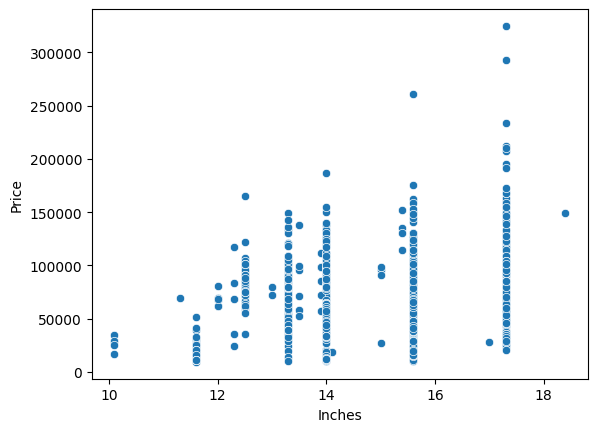

In [19]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [20]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [21]:
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
df.sample(5)    # random 5 rows

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
771,Samsung,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon 540,Windows 10,1.71,95850.72,1
1226,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,78694.56,1
564,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,44701.92,0
470,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.72,1
1177,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,69530.40,0


In [23]:
df['isIPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [25]:
df[['width', 'height']] = df['ScreenResolution'].str.rsplit(' ', n=1).str[-1].str.split('x', expand=True)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,width,height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
df['width'] = df['width'].astype(int)
df['height'] = df['height'].astype(int)

In [28]:
df.drop(columns=['ScreenResolution'], inplace= True)

In [29]:
df.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,width,height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int64  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float64
 9   Price        1303 non-null   float64
 10  touchscreen  1303 non-null   int64  
 11  isIPS        1303 non-null   int64  
 12  width        1303 non-null   int64  
 13  height       1303 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 142.6+ KB


In [31]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
width,0.556529
height,0.552809
isIPS,0.252208
Weight,0.210370
touchscreen,0.191226
Inches,0.068197


In [32]:
# so we have to find ppi where we have to take width height and inches to solve it
df['ppi'] = np.sqrt(df['width']**2 + df['height']**2) / df['Inches']

In [33]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,width,height,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005


In [34]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
width,0.556529
height,0.552809
ppi,0.473487
isIPS,0.252208
Weight,0.210370
touchscreen,0.191226
Inches,0.068197


In [35]:
# so as we see above inches col does not have that much powerful relation to Price so we have to drop it
# iske sath hi hum width or height cols ko bhi drop kar denge kyuki humne ppi bna liya to iska koi itna use nhi h
df.drop(columns = ['Inches', 'width', 'height'], inplace = True)

In [36]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [37]:
df['CPU_Speed_GHz'] = df['Cpu'].str.rsplit(' ', n=1).str[-1].str.replace('GHz', '').astype(float)

In [38]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,2.3


In [39]:
df['CPU_Brand'] = df['Cpu'].str.split().str[0]

In [40]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,2.3,Intel


In [41]:
df['Series'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[1:-1]))

In [42]:
df.drop(columns=['Cpu'], inplace = True)

In [43]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,Series
678,LG,Ultrabook,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.09,122490.720,0,1,141.211998,1.8,Intel,Core i7 8550U
426,Dell,Notebook,8,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,60867.072,0,0,141.211998,1.8,Intel,Core i7 8550U
1094,HP,Netbook,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.720,0,0,125.367428,2.3,Intel,Core i5 6200U
751,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.84,101232.000,0,0,141.211998,2.4,Intel,Core i5 6300U
232,Lenovo,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,79866.720,0,1,141.211998,2.8,Intel,Core i7 7700HQ
482,HP,Notebook,4,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49,38681.280,0,1,165.632118,1.6,Intel,Core i5 8250U
246,HP,Notebook,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,29783.520,1,0,100.454670,2.5,Intel,Core i5 7200U
385,Lenovo,Ultrabook,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,121584.960,0,1,209.800683,2.7,Intel,Core i7 7500U
103,HP,Ultrabook,8,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,59620.320,0,1,165.632118,2.7,Intel,Core i7 7500U
1274,Asus,Notebook,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.320,0,0,100.454670,1.6,Intel,Celeron Dual Core N3050


In [44]:
df['Series'].value_counts()

,count
Series,
Core i5 7200U,193
Core i7 7700HQ,147
Core i7 7500U,135
Core i3 6006U,81
Core i7 8550U,73
...,...
Core i7 6560U,1
Core M 6Y54,1
Pentium Dual Core 4405Y,1


In [45]:
df['Series'].value_counts().head(20)

,count
Series,
Core i5 7200U,193
Core i7 7700HQ,147
Core i7 7500U,135
Core i3 6006U,81
Core i7 8550U,73
Core i5 8250U,72
Core i5 6200U,68
Core i7 6500U,51
Core i7 6700HQ,43


In [46]:
def remove_trailing_numbers(text):
    words = text.split()
    last = words[-1]

    # agar last word me digit hai aur puri string me 'i3', 'i5', 'i7' jaisa kuch hai to mat hatao
    if any(ch.isdigit() for ch in last) and not ('i3' in last.lower() or 'i5' in last.lower() or 'i7' in last.lower()):
        words = words[:-1]
    return ' '.join(words)

df['CPU_Series'] = df['Series'].apply(remove_trailing_numbers)
df.drop(columns = ['Series'], inplace = True)
# cpu ka series col vapis banana h shi se nhi bna apple me 6700Q vali value nhi h sidha core i5 h to vo shi krna
# iss code se vapis banaya h

In [47]:
df['CPU_Series'].value_counts()

,count
CPU_Series,
Core i7,527
Core i5,423
Core i3,136
Celeron Dual Core,80
Pentium Quad Core,27
Core M,19
A9-Series,17
Atom,13
A6-Series,11


In [48]:
df.head(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,CPU_Series
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,2.3,Intel,Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,1.8,Intel,Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,2.5,Intel,Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,2.7,Intel,Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,3.1,Intel,Core i5
5,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,3.0,AMD,A9-Series
6,Apple,Ultrabook,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,2.2,Intel,Core i7
7,Apple,Ultrabook,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,1.8,Intel,Core i5
8,Asus,Ultrabook,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,1.8,Intel,Core i7
9,Acer,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,1.6,Intel,Core i5


In [49]:
# now memory col
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [50]:
# making new cols
df['SSD'] = 0.0
df['HDD'] = 0.0
df['Hybrid'] = 0.0
df['Flash_Storage'] = 0.0

In [51]:
def convert_to_gb(value):
    value = value.upper().strip()  # sab capital aur extra space hatao
    value = value.replace('STORAGE', '').replace('HYBRID', '').replace('SSD', '').replace('HDD', '').replace('FLASH', '')
    value = value.strip()  # clean again

    # ab value me sirf number + GB/TB hona chahiye
    if 'TB' in value:
        value = value.replace('TB', '').strip()
        return float(value) * 1024
    elif 'GB' in value:
        value = value.replace('GB', '').strip()
        return float(value)
    else:
        return 0


In [52]:
for i, row in df.iterrows():
    parts = row['Memory'].split('+')
    for part in parts:
        part = part.strip()
        size = convert_to_gb(part)

        if 'SSD' in part.upper():
            df.at[i, 'SSD'] += size
        elif 'HDD' in part.upper():
            df.at[i, 'HDD'] += size
        elif 'HYBRID' in part.upper():
            df.at[i, 'Hybrid'] += size
        elif 'FLASH' in part.upper():
            df.at[i, 'Flash_Storage'] += size


In [53]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,CPU_Series,SSD,HDD,Hybrid,Flash_Storage
1019,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,118761.12,0,0,157.350512,2.50,Intel,Core i7,256.0,0.0,0.0,0.0
161,Acer,Notebook,4,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,42890.40,0,1,127.335675,1.60,Intel,Core i5,256.0,0.0,0.0,0.0
1239,Lenovo,Notebook,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.40,79866.72,0,1,165.632118,2.70,Intel,Core i7,512.0,0.0,0.0,0.0
470,HP,2 in 1 Convertible,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.72,1,1,331.264236,1.80,Intel,Core i7,512.0,0.0,0.0,0.0
162,Dell,Notebook,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,38787.84,0,0,141.211998,1.60,Intel,Core i5,256.0,0.0,0.0,0.0
952,Toshiba,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,77788.80,0,0,165.632118,2.30,Intel,Core i5,256.0,0.0,0.0,0.0
626,Mediacom,Notebook,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,12733.92,0,0,157.350512,1.44,Intel,Atom,0.0,0.0,0.0,32.0
276,Dell,Notebook,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,58554.72,0,0,127.335675,1.80,Intel,Core i7,128.0,1024.0,0.0,0.0
1006,HP,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,64202.40,0,0,157.350512,2.50,Intel,Core i5,256.0,0.0,0.0,0.0
84,Acer,Notebook,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,21045.60,0,0,100.454670,3.00,AMD,A9-Series,0.0,1024.0,0.0,0.0


In [54]:
df.drop(columns=['Memory'], inplace = True)

In [55]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,CPU_Series,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,2.3,Intel,Core i5,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,1.8,Intel,Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,2.5,Intel,Core i5,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,2.7,Intel,Core i7,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,3.1,Intel,Core i5,256.0,0.0,0.0,0.0


In [56]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
SSD,0.670682
ppi,0.473487
CPU_Speed_GHz,0.430293
isIPS,0.252208
Weight,0.210370
touchscreen,0.191226
Hybrid,0.008011
Flash_Storage,-0.040511


In [57]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [58]:
# Split GPU column into parts
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])           # e.g., Intel
df['GPU_Series'] = df['Gpu'].apply(lambda x: x.split()[1])          # e.g., HD, GeForce, Radeon

# Optional: extract model if present (safe way)
df['GPU_Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[2:]) if len(x.split()) > 2 else None)

In [59]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,CPU_Series,SSD,HDD,Hybrid,Flash_Storage,GPU_Brand,GPU_Series,GPU_Model
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,2.3,Intel,Core i5,128.0,0.0,0.0,0.0,Intel,Iris,Plus Graphics 640
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,1.8,Intel,Core i5,0.0,0.0,0.0,128.0,Intel,HD,Graphics 6000
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,2.5,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,HD,Graphics 620
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,2.7,Intel,Core i7,512.0,0.0,0.0,0.0,AMD,Radeon,Pro 455
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,3.1,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,Iris,Plus Graphics 650


In [60]:
df['GPU_Model'].value_counts()

,count
GPU_Model,
Graphics 620,350
Graphics 520,185
GTX 1050,66
GTX 1060,48
940MX,43
...,...
M500M,1
R7 M360,1
M3000M,1


In [61]:
df['GPU_Type'] = df['GPU_Brand'].apply(lambda x: 'Integrated' if x in ['Intel', 'ARM'] else 'Dedicated')

In [62]:
# 'GPU_Type' Ye column price ke sath strong correlation dikhata hai 🔥(kyo ki dedicated GPU wale laptops expensive hote hain).
df.head(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,isIPS,ppi,...,CPU_Brand,CPU_Series,SSD,HDD,Hybrid,Flash_Storage,GPU_Brand,GPU_Series,GPU_Model,GPU_Type
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,...,Intel,Core i5,128.0,0.0,0.0,0.0,Intel,Iris,Plus Graphics 640,Integrated
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,...,Intel,Core i5,0.0,0.0,0.0,128.0,Intel,HD,Graphics 6000,Integrated
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,...,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,HD,Graphics 620,Integrated
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,...,Intel,Core i7,512.0,0.0,0.0,0.0,AMD,Radeon,Pro 455,Dedicated
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,...,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,Iris,Plus Graphics 650,Integrated
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,...,AMD,A9-Series,0.0,500.0,0.0,0.0,AMD,Radeon,R5,Dedicated
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,...,Intel,Core i7,0.0,0.0,0.0,256.0,Intel,Iris,Pro Graphics,Integrated
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,...,Intel,Core i5,0.0,0.0,0.0,256.0,Intel,HD,Graphics 6000,Integrated
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,...,Intel,Core i7,512.0,0.0,0.0,0.0,Nvidia,GeForce,MX150,Dedicated
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,...,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,UHD,Graphics 620,Integrated


In [63]:
# so we have to drop GPU and GPU_model column because gpu se or col bna liye or model isliye kyuki unique values bhot h to itna kuch shi kam nhi krega isliye
# ye col htana hi shi h iske bjaye gpu_type jyada acha kam krega
df.drop(columns = ['Gpu','GPU_Model'], inplace = True)

In [64]:
df.sample(20)

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,CPU_Series,SSD,HDD,Hybrid,Flash_Storage,GPU_Brand,GPU_Series,GPU_Type
619,Acer,2 in 1 Convertible,4,Chrome OS,1.25,20193.1200,1,1,135.094211,1.6,Intel,Celeron Quad Core,0.0,0.0,0.0,32.0,Intel,HD,Integrated
5,Acer,Notebook,4,Windows 10,2.10,21312.0000,0,0,100.454670,3.0,AMD,A9-Series,0.0,500.0,0.0,0.0,AMD,Radeon,Dedicated
8,Asus,Ultrabook,16,Windows 10,1.30,79653.6000,0,0,157.350512,1.8,Intel,Core i7,512.0,0.0,0.0,0.0,Nvidia,GeForce,Dedicated
1023,HP,Notebook,8,Windows 10,1.64,63159.7104,0,0,157.350512,2.7,Intel,Core i7,256.0,0.0,0.0,0.0,Nvidia,GeForce,Dedicated
67,HP,Notebook,4,Windows 10,1.44,12201.1200,0,0,111.935204,1.6,Intel,Celeron Dual Core,32.0,0.0,0.0,0.0,Intel,HD,Integrated
1178,MSI,Gaming,16,Windows 10,1.91,114731.5536,0,0,141.211998,2.6,Intel,Core i7,128.0,1024.0,0.0,0.0,Nvidia,GeForce,Dedicated
51,Acer,Notebook,8,Windows 10,2.20,44808.4800,0,1,141.211998,1.8,Intel,Core i7,256.0,0.0,0.0,0.0,Nvidia,GeForce,Dedicated
490,Lenovo,Notebook,8,Windows 10,2.30,53918.8272,0,1,141.211998,2.5,Intel,Core i5,256.0,0.0,0.0,0.0,Nvidia,GeForce,Dedicated
132,Acer,Ultrabook,8,Windows 10,1.60,47099.5200,0,1,157.350512,1.8,Intel,Core i7,256.0,0.0,0.0,0.0,Intel,UHD,Integrated
296,Acer,Notebook,8,Linux,2.50,52161.1200,0,0,141.211998,2.8,Intel,Core i7,256.0,0.0,0.0,0.0,Nvidia,GeForce,Dedicated


In [65]:
df['OpSys'].value_counts()          # mac, windows, linux, others, no

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [66]:
"""
CPU_Brand, CPU_Series, GPU_Brand, GPU_Series, GPU_Type
"""
df['CPU_Brand'].value_counts()

,count
CPU_Brand,
Intel,1240
AMD,62
Samsung,1


In [67]:
df['CPU_Series'].value_counts()

,count
CPU_Series,
Core i7,527
Core i5,423
Core i3,136
Celeron Dual Core,80
Pentium Quad Core,27
Core M,19
A9-Series,17
Atom,13
A6-Series,11


In [68]:
df['GPU_Brand'].value_counts()

,count
GPU_Brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [69]:
df['GPU_Series'].value_counts()

,count
GPU_Series,
HD,639
GeForce,368
Radeon,173
UHD,68
Quadro,31
Iris,14
FirePro,5
R4,1
R17M-M1-70,1


In [70]:
df['GPU_Type'].value_counts()

,count
GPU_Type,
Integrated,723
Dedicated,580


In [71]:
# making new col of OS
import re

def categorize_os(x):
    if re.search(r'windows', x, re.IGNORECASE):
        return 'Windows'
    elif re.search(r'mac', x, re.IGNORECASE):
        return 'Mac'
    elif re.search(r'linux', x, re.IGNORECASE):
        return 'Linux'
    elif re.search(r'no os', x, re.IGNORECASE):
        return 'No OS'
    else:
        return 'Others'

df['OS'] = df['OpSys'].apply(categorize_os)

In [72]:
df.drop(columns = ['OpSys'], inplace = True)

In [73]:
df['OS'].value_counts()

,count
OS,
Windows,1125
No OS,66
Linux,62
Others,29
Mac,21


In [74]:
df.head(10)

,Company,TypeName,Ram,Weight,Price,touchscreen,isIPS,ppi,CPU_Speed_GHz,CPU_Brand,CPU_Series,SSD,HDD,Hybrid,Flash_Storage,GPU_Brand,GPU_Series,GPU_Type,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,2.3,Intel,Core i5,128.0,0.0,0.0,0.0,Intel,Iris,Integrated,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,1.8,Intel,Core i5,0.0,0.0,0.0,128.0,Intel,HD,Integrated,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,2.5,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,HD,Integrated,No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,2.7,Intel,Core i7,512.0,0.0,0.0,0.0,AMD,Radeon,Dedicated,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,3.1,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,Iris,Integrated,Mac
5,Acer,Notebook,4,2.10,21312.0000,0,0,100.454670,3.0,AMD,A9-Series,0.0,500.0,0.0,0.0,AMD,Radeon,Dedicated,Windows
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,2.2,Intel,Core i7,0.0,0.0,0.0,256.0,Intel,Iris,Integrated,Mac
7,Apple,Ultrabook,8,1.34,61735.5360,0,0,127.677940,1.8,Intel,Core i5,0.0,0.0,0.0,256.0,Intel,HD,Integrated,Mac
8,Asus,Ultrabook,16,1.30,79653.6000,0,0,157.350512,1.8,Intel,Core i7,512.0,0.0,0.0,0.0,Nvidia,GeForce,Dedicated,Windows
9,Acer,Ultrabook,8,1.60,41025.6000,0,1,157.350512,1.6,Intel,Core i5,256.0,0.0,0.0,0.0,Intel,UHD,Integrated,Windows


In [75]:
df.shape      # phle 12 col they ab 19 h

(1303, 19)

## Imports

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

In [77]:
# Separate features (X) and target (y)

X = df.drop("Price", axis=1)   # Price is target
y = df["Price"]

In [78]:
# Identify column types for encoding

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

categorical_cols, numerical_cols

(['Company',
  'TypeName',
  'CPU_Brand',
  'CPU_Series',
  'GPU_Brand',
  'GPU_Series',
  'GPU_Type',
  'OS'],
 ['Ram',
  'Weight',
  'touchscreen',
  'isIPS',
  'ppi',
  'CPU_Speed_GHz',
  'SSD',
  'HDD',
  'Hybrid',
  'Flash_Storage'])

In [79]:
# Create transformers for categorical and numerical data

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

In [80]:
# Final pipeline = preprocessing + model

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=300, random_state=42))
])

In [81]:
# Train test split and model training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'CPU_Brand', 'CPU_Series',
                                                   'GPU_Brand', 'GPU_Series',
                                                   'GPU_Type', 'OS']),
                                                 ('num', 'passthrough',
                                                  ['Ram', 'Weight',
                                                   'touchscreen', 'isIPS',
                                                   'ppi', 'CPU_Speed_GHz',
                                                   'SSD', 'HDD', 'Hybrid',
                                                   'Flash_Storage'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [82]:
# Model accuracy check

score = model.score(X_test, y_test)
print("Model R² Score:", score)

Model R² Score: 0.823709478687233


In [83]:
# Save the entire pipeline as a .pkl file

joblib.dump(model, "laptop_price_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [84]:
df.to_csv("clean_laptop_data.csv", index=False)